In [ ]:
import os
results_dir='RESULTS_WEEK_1'
if not os.path.exists(results_dir):
    os.mkdir(results_dir)


In [ ]:
# DAY_2 Fetch ohhlcv data and check the MA and calculate rolling volaitlity and plot them 

# Import necessary libraries
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

binance = ccxt.binance()

# Fetch the OHLCV data for a given symbol
symbols=['BTC/USDT','ETH/USDT','BNB/USDT']

ohlcv_data = {}

for symbol in symbols:
    try:
        ohlcv = binance.fetch_ohlcv(symbol, timeframe='1h', limit=1000)
        ohlcv=pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        ohlcv['timestamp'] = pd.to_datetime(ohlcv['timestamp'], unit='ms')
        ohlcv_data[symbol] = ohlcv
    except Exception as e:
        print(f'Error fetching OHLCV data for {symbol}: {str(e)}')
DATA=pd.concat(ohlcv_data,axis=1)
DATA.columns = ['_'.join(col).strip() for col in DATA.columns.values]
DATA['DATE']=DATA['BTC/USDT_timestamp']
DATA.set_index('DATE',inplace=True)
columns_to_drop = ['BTC/USDT_timestamp', 'ETH/USDT_timestamp', 'BNB/USDT_timestamp']
DATA.drop(columns=columns_to_drop, inplace=True)


# calculating log returns moving average and rolling volatility
for symbol in symbols:
    DATA[f'{symbol}_log_return'] = np.log(DATA[f'{symbol}_close'] / DATA[f'{symbol}_close'].shift(1))
    DATA[f'{symbol}_MA_20'] = DATA[f'{symbol}_close'].rolling(window=20).mean()
    DATA[f'{symbol}_volatility_20'] = DATA[f'{symbol}_log_return'].rolling(window=20).std()*np.sqrt(252)
    DATA[f'{symbol}_MA_50'] = DATA[f'{symbol}_close'].rolling(window=50).mean()
    

# Plotting the mv=oving avergaes and volaltitly

plt.style.use('ggplot')
fig, ax = plt.subplots(len(symbols),1, figsize=(15, 10))

file_path=os.path.join(results_dir, 'moving_averages.png')
for i, symbol in enumerate(symbols):
    ax[i].plot(DATA[f'{symbol}_close'], label=f'{symbol} close')
    ax[i].plot(DATA[f'{symbol}_MA_20'], label=f'{symbol} MA_20')
    ax[i].plot(DATA[f'{symbol}_MA_50'], label=f'{symbol} MA_50')
    ax[i].set_title(f'{symbol} price and moving averages')
    ax[i].legend()
    ax[i].grid(True)
    fig.subplots_adjust(hspace=0.5)
    
fig.subplots_adjust(hspace=0.5)
plt.savefig(file_path)  

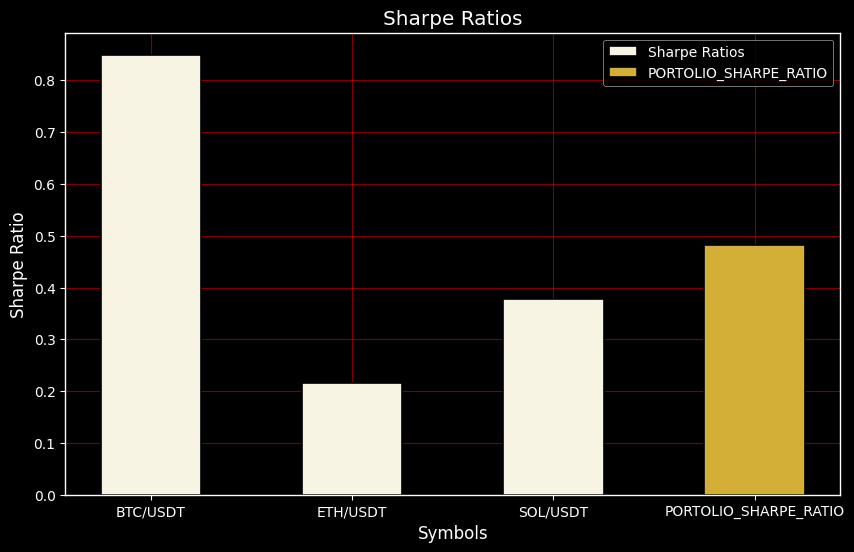

In [26]:

                                            # DAY 3 PORTFOLIO RISK AND RETURN ANALYSIS

# IMPORT USEFUL LIBRARIES

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import ccxt
                                                # FETCHING OHLCV DATA FOR GIVEEN COINS
binance=ccxt.binance()
symbols=['BTC/USDT','ETH/USDT','SOL/USDT']
ohlcv_data={}
for symbol in symbols:
    try:
        ohlcv=binance.fetch_ohlcv(symbol,timeframe='1d',limit=1000)
        ohlcv=pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        ohlcv['timestamp'] = pd.to_datetime(ohlcv['timestamp'], unit='ms')
        ohlcv_data[symbol]=ohlcv
    except Exception as e:
        print(f'Error fetching OHLCV data for {symbol}: {str(e)}')

DATA=pd.concat(ohlcv_data,axis=1)
DATA.columns = ['_'.join(col).strip() for col in DATA.columns.values]
DATA['DATE']=DATA['BTC/USDT_timestamp']
DATA.set_index('DATE',inplace=True)
columns_to_drop = ['BTC/USDT_timestamp', 'ETH/USDT_timestamp', 'SOL/USDT_timestamp']
DATA.drop(columns=columns_to_drop, inplace=True)
PORTFOLIO_DATA={}
RETURN_DATA=pd.DataFrame()
SHARPE_RATIOS={}

for symbol in symbols:
    DATA[f'{symbol}_log_return'] = np.log(DATA[f'{symbol}_close'] / DATA[f'{symbol}_close'].shift(1))
    PORTFOLIO_DATA[symbol]={}
    PORTFOLIO_DATA[symbol]['LOG_RETURN'] = DATA[f'{symbol}_log_return'].mean()*252
    PORTFOLIO_DATA[symbol]['VOLATILITY'] =DATA[f'{symbol}_log_return'].std()*np.sqrt(252)
    PORTFOLIO_DATA[symbol]['WEIGHT'] = 1/len(symbols)
    RETURN_DATA[symbol]=DATA[f'{symbol}_log_return']
    SHARPE_RATIOS[symbol]=PORTFOLIO_DATA[symbol]['LOG_RETURN']/PORTFOLIO_DATA[symbol]['VOLATILITY']
   
PORTFOLIO_DATA=pd.DataFrame(PORTFOLIO_DATA).T 
PORTFOLIO_RESULTS={}
    
PORTFOLIO_RETURN=(PORTFOLIO_DATA['LOG_RETURN']*PORTFOLIO_DATA['WEIGHT']).sum()


COV_MATRIX_ANNUAL=RETURN_DATA.cov()*252
WEIGHTS=np.array([1/len(symbols)]*len(symbols))




                                    # PORTFOLIO RESULTS LIKE SHARPE RATIO RETURNS AND VOLALITILITY

PORTFOLIO_RESULTS['RETURNS']=(PORTFOLIO_DATA['LOG_RETURN']*PORTFOLIO_DATA['WEIGHT']).sum()
PORTFOLIO_RESULTS['VOLATILITY']=np.sqrt(WEIGHTS.T @ COV_MATRIX_ANNUAL @ WEIGHTS)
PORTFOLIO_RESULTS['SHARPE_RATIO']=PORTFOLIO_RETURN/PORTFOLIO_RESULTS['VOLATILITY']
PORTFOLIO_RESULTS.items()

                                    # Plotting the Sharpe Ratios   

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.style.use('dark_background')
file_path=os.path.join(results_dir, 'sharpe_ratios_Equalweighted_portfolio_sharpe_ratios.png')                                                   

ax.bar(SHARPE_RATIOS.keys(), SHARPE_RATIOS.values(), color='#f8f4e3',width=0.5,label='Sharpe Ratios',edgecolor='black',linewidth=1.2)
plt.bar('PORTOLIO_SHARPE_RATIO',PORTFOLIO_RESULTS['SHARPE_RATIO'],color='#d4af37',width=0.5,label='PORTOLIO_SHARPE_RATIO',edgecolor='black',linewidth=1.2)

ax.set_title('Sharpe Ratios')
ax.set_xlabel('Symbols')
ax.set_ylabel('Sharpe Ratio')
ax.legend(loc='upper right',frameon=True)
plt.tight_layout
ax.grid(True,alpha=0.5,color='r')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()


C:\Users\ABILFAZAL UNWALA\AppData\Local\Temp\ipykernel_25684\2159339277.py:150: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(VOLATILITIES, RETURNS, cmap='viridis', marker='o')


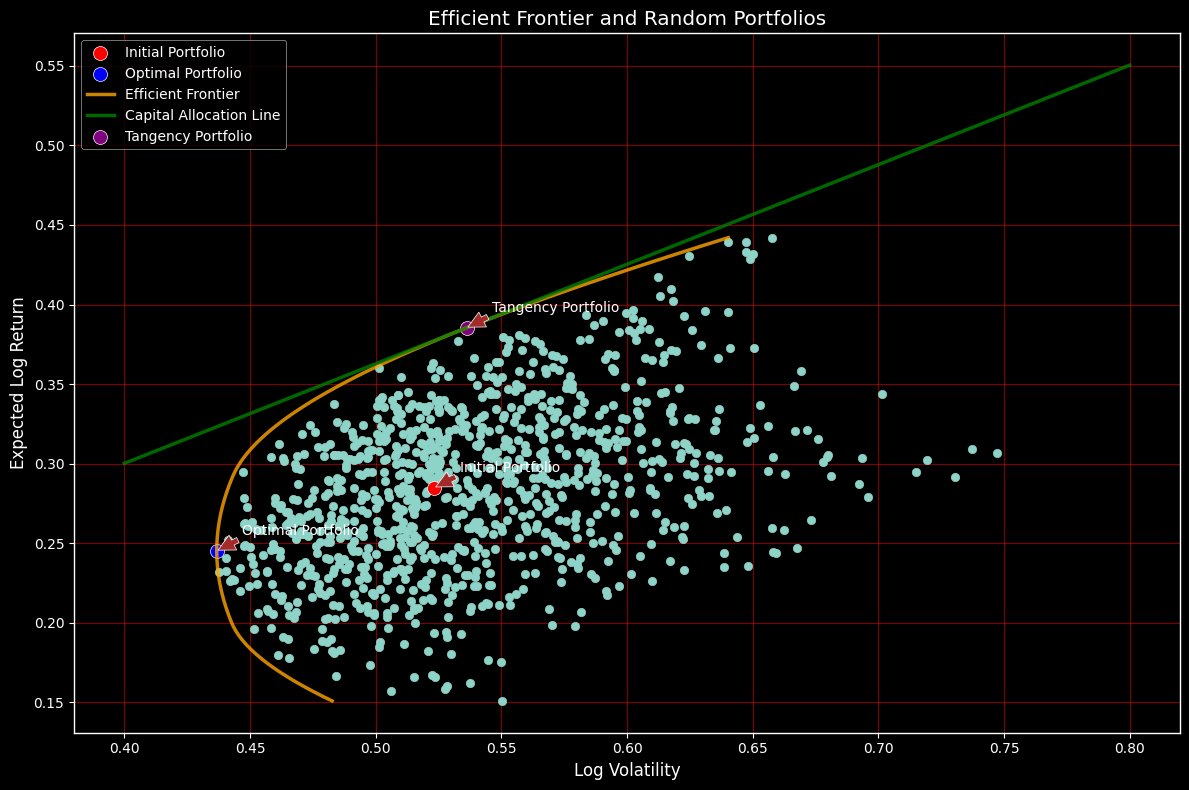

In [28]:
# DAY 4 PORTFOLIO OPTIMIZATION , EFFICIENT FRONTIER ,TANGENCY PORTFOLIO AND PLOT THEM
                                        
                                        
                                        # Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ccxt
import scipy.optimize as sco
import scipy.stats as stats
                                    # FETCH DATA AND CALCULAYE THE LOG RETURN AND VOLATILITY
binance = ccxt.binance()
symbols = ['ETH/USDT', 'SOL/USDT','BNB/USDT','XRP/USDT']
CLOSE_DATA = pd.DataFrame()
PORTFOLIO_DATA={}
WEIGHTS=np.array([1/len(symbols)]*len(symbols))

for symbol in symbols:
    try:
        ohlcv = binance.fetch_ohlcv(symbol, timeframe='1d', limit=1000)
        ohlcv = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        ohlcv['DATE'] = pd.to_datetime(ohlcv['timestamp'], unit='ms')
        CLOSE_DATA[symbol] = ohlcv['close']

       
        
    except Exception as e:
        print(f'Error fetching OHLCV data for {symbol}: {str(e)}')

CLOSE_DATA.dropna(inplace=True)
CLOSE_DATA.set_index(ohlcv['DATE'], inplace=True)
CLOSE_DATA
LOG_RETURN_DATA = pd.DataFrame()
MEAN_LOG_RETURN = {}
                                
                                
                                # CALCUALTIN THE PORTFOLIO RETUN AND VOLATILITY 
for symbol in symbols:
    LOG_RETURN_DATA[f'{symbol}'] = np.log(CLOSE_DATA[symbol] / CLOSE_DATA[symbol].shift(1))
    PORTFOLIO_DATA[symbol] = {}
    PORTFOLIO_DATA[symbol]['LOG_RETURN'] =  LOG_RETURN_DATA[f'{symbol}'] .mean() * 252
    PORTFOLIO_DATA[symbol]['VOLATILITY'] = LOG_RETURN_DATA[f'{symbol}'].std() * np.sqrt(252)
    PORTFOLIO_DATA[symbol]['WEIGHT'] = 1 / len(symbols)
    MEAN_LOG_RETURN[symbol] = PORTFOLIO_DATA[symbol]['LOG_RETURN'] 
    
# CALCULATING THE COPVARIENCE MATRUIX AND CORRELATION MATRIX
COV_MATRIX_ANNUAL = LOG_RETURN_DATA.cov() * 252
CORRELATION_MATRIX = LOG_RETURN_DATA.corr()
COV_MATRIX_ANNUAL

# INITIAL RETURN AND VOLATILITY VALUE 
INITIAL_VOLAITLITY= np.sqrt(WEIGHTS.T @ COV_MATRIX_ANNUAL @ WEIGHTS)
MEAN_LOG_RETURN=pd.DataFrame(MEAN_LOG_RETURN.values(),index=MEAN_LOG_RETURN.keys(),columns=['LOG_RETURN'])
INITIAL_RETURN=MEAN_LOG_RETURN.values.T @ WEIGHTS
INITIAL_sharpe_ratio = INITIAL_RETURN / INITIAL_VOLAITLITY


# minimum varince portfolio using the scipy.optimise library

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for x in range(len(symbols)))

optimal_weights = sco.minimize(
    lambda x: np.sqrt(x.T @ COV_MATRIX_ANNUAL @ x),
    WEIGHTS,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)


                                # Calcuating the optimal weights, return, volatility and sharpe ratio

optimal_weights=optimal_weights.x
optimial_return= MEAN_LOG_RETURN.values.T @ optimal_weights
optimial_volatility=np.sqrt(optimal_weights.T @ COV_MATRIX_ANNUAL @ optimal_weights)
optimal_sharpe_ratio=optimial_return/optimial_volatility


                                    # GENERATING THE EFFCIENT FRONTIER AND RANDOM PORTFOLIO WEIGHTS 
GENERATORS=1000
GEN_WEIGHTS=np.random.standard_normal(size=(GENERATORS,len(symbols)))
GEN_WEIGHTS=np.abs(GEN_WEIGHTS)
for i in range(GEN_WEIGHTS.shape[0]):
    GEN_WEIGHTS[i]=GEN_WEIGHTS[i]/np.sum(GEN_WEIGHTS[i])

RETURNS=GEN_WEIGHTS @ MEAN_LOG_RETURN.values

VOLATILITIES=np.sqrt(np.diag(GEN_WEIGHTS @ COV_MATRIX_ANNUAL.values @ GEN_WEIGHTS.T))


                                            # GENERATING THE TANGENCY PORTFOLIO
risk_free_rate = 0.05
def negative_sharpe_ratio(weights,  MEAN_LOG_RETURN, cov_matrix, risk_free_rate):
    portfolio_return = weights @ MEAN_LOG_RETURN.values
    portfolio_volatility = np.sqrt(weights.T @ cov_matrix @ weights)
    return -(portfolio_return - risk_free_rate) / portfolio_volatility
    


                                            # CACULATING THE TANGENCY PORTFOLIO WEIGHTS 
bounds = tuple((0, 1) for x in range(len(symbols)))
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

WEIGHTS_tangency=sco.minimize(negative_sharpe_ratio, WEIGHTS, args=(MEAN_LOG_RETURN, COV_MATRIX_ANNUAL, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints).x
TANGENCY_PORTFOLIO_RETURN = MEAN_LOG_RETURN.values.T @ WEIGHTS_tangency
TANGENCY_PORTFOLIO_VOLATILITY = np.sqrt(WEIGHTS_tangency.T @ COV_MATRIX_ANNUAL @ WEIGHTS_tangency)




                                            # GENERARTIN THE CAPITAL ALOCATIION LINE THE TANGENCY LINE

SIGMA_RANGE=np.linspace(0.4, 0.8, 100)
TANGENCY_LINE = risk_free_rate + (TANGENCY_PORTFOLIO_RETURN - risk_free_rate) / TANGENCY_PORTFOLIO_VOLATILITY * SIGMA_RANGE





# GENERATING THE EFFICIENT FRONTIER
TARGET_RETURNS = np.linspace(RETURNS.min(), RETURNS.max(), 100)
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

def portfolio_return(weights, mean_returns):
    return weights @ mean_returns.values

def optimal_volatility(MEAN_LOG_RETURN,TARGET_RETURNS, cov_matrix,weights=WEIGHTS):
    bounds = tuple((0, 1) for x in range(len(symbols)))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: portfolio_return(x, MEAN_LOG_RETURN) - TARGET_RETURNS})

                               
                               
    result = sco.minimize(portfolio_volatility, weights, args=(MEAN_LOG_RETURN, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
    return result.fun                           
                               
TARGET_VOLATILITY = np.array([optimal_volatility(MEAN_LOG_RETURN, target_return, COV_MATRIX_ANNUAL) for target_return in TARGET_RETURNS])                
                               
                                
                                
                                
                                
                                # PLOTING THE EFFICIENT FRONTIER AND TANGENCY LINE aND RANDOM PORTFOLIOS and tangency portfolio 
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 8))
file_path=os.path.join(results_dir, 'efficient_frontier_Tangency_portfolio.png')

ax.scatter(VOLATILITIES, RETURNS, cmap='viridis', marker='o')
ax.scatter(INITIAL_VOLAITLITY, INITIAL_RETURN, color='red', marker='o', label='Initial Portfolio',s=100,linewidths=0.5,edgecolors='white')
ax.scatter(optimial_volatility, optimial_return, color='blue', marker='o', label='Optimal Portfolio',s=100,linewidths=0.5,edgecolors='white')
ax.plot(TARGET_VOLATILITY, TARGET_RETURNS, color='orange', label='Efficient Frontier',linewidth=2.5, alpha=0.8)
ax.plot(SIGMA_RANGE, TANGENCY_LINE, color='green', label='Capital Allocation Line',linewidth=2.5, alpha=0.8)
ax.scatter(TANGENCY_PORTFOLIO_VOLATILITY, TANGENCY_PORTFOLIO_RETURN, color='purple', marker='o', label='Tangency Portfolio',s=100,linewidths=0.5,edgecolors='white')
ax.set_xlabel('Log Volatility')
ax.set_ylabel('Expected Log Return')
ax.legend(loc='upper left', frameon=True)
ax.annotate('Initial Portfolio', xy=(INITIAL_VOLAITLITY, INITIAL_RETURN), xytext=(INITIAL_VOLAITLITY+0.01, INITIAL_RETURN+0.01), arrowprops=dict(facecolor='brown', shrink=0.05))
ax.annotate('Optimal Portfolio', xy=(optimial_volatility, optimial_return), xytext=(optimial_volatility+0.01, optimial_return+0.01), arrowprops=dict(facecolor='brown', shrink=0.05))
ax.annotate('Tangency Portfolio', xy=(TANGENCY_PORTFOLIO_VOLATILITY, TANGENCY_PORTFOLIO_RETURN), xytext=(TANGENCY_PORTFOLIO_VOLATILITY+0.01, TANGENCY_PORTFOLIO_RETURN+0.01), arrowprops=dict(facecolor='brown', shrink=0.05))
ax.set_title('Efficient Frontier and Random Portfolios')    
ax.grid(True, alpha=0.5, color='r')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()